# Plotting centroid distances
Here we plot the distances of the centroids of the clusters obtained from the point clouds from the wall.

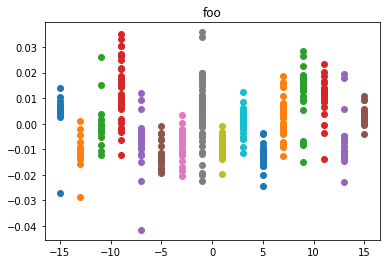

In [28]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from thesis.utils import sorted_ids_by_angle, laser_id_to_angle

cm = plt.get_cmap('plasma') 
cNorm  = colors.Normalize(vmin=0, vmax=len(sorted_ids_by_angle)-1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)


def plot_centroid_distances(filename, title):
    distances = [[] for _ in range(16)]
    current_id = -1
    # the centroid distances in this file should be sorted by the centroids z-coordinate
    with open(filename) as f:
        for line in f:
            if line.startswith("Laser id"):
                current_id = current_id + 1
            else:
                distances[current_id].append(float(line.rstrip("\n")))

    # try sorting by the angle
    for i, idx in enumerate(sorted_ids_by_angle):
        plt.scatter(x=[laser_id_to_angle[idx] for _ in range(len(distances[idx][6:]))], y=distances[idx][6:])
    plt.title(title)
    plt.show()



plot_centroid_distances("/home/branislav/repos/github_indoor++/pcds/error_measurements/distances/5m_2_distances_wall_centroids.txt", "foo")